In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
a = 0.02  # Time constant of the recovery variable
b = 0.2   # Sensitivity of the recovery variable
c = -65   # Reset potential
d = 8     # Adjustment of the recovery variable after a spike

T = 1000
dt = 0.1
time = np.arange(0, T, dt)

v = -65
u = b * v  # Initial value of the recovery variable
I = 10

spike_times = []
V_trace = []
U_trace = []

In [7]:
for t in time:

    if v >= 30:
        spike_times.append(t)
        v = c
        u += d

    else:
        dv = 0.04 * v**2 + 5 * v + 140 - u + I
        du = a * (b * v - u)
        v += dv * dt
        u += du * dt
        # Update membrane potential and recovery variable

    V_trace.append(v)
    U_trace.append(u)

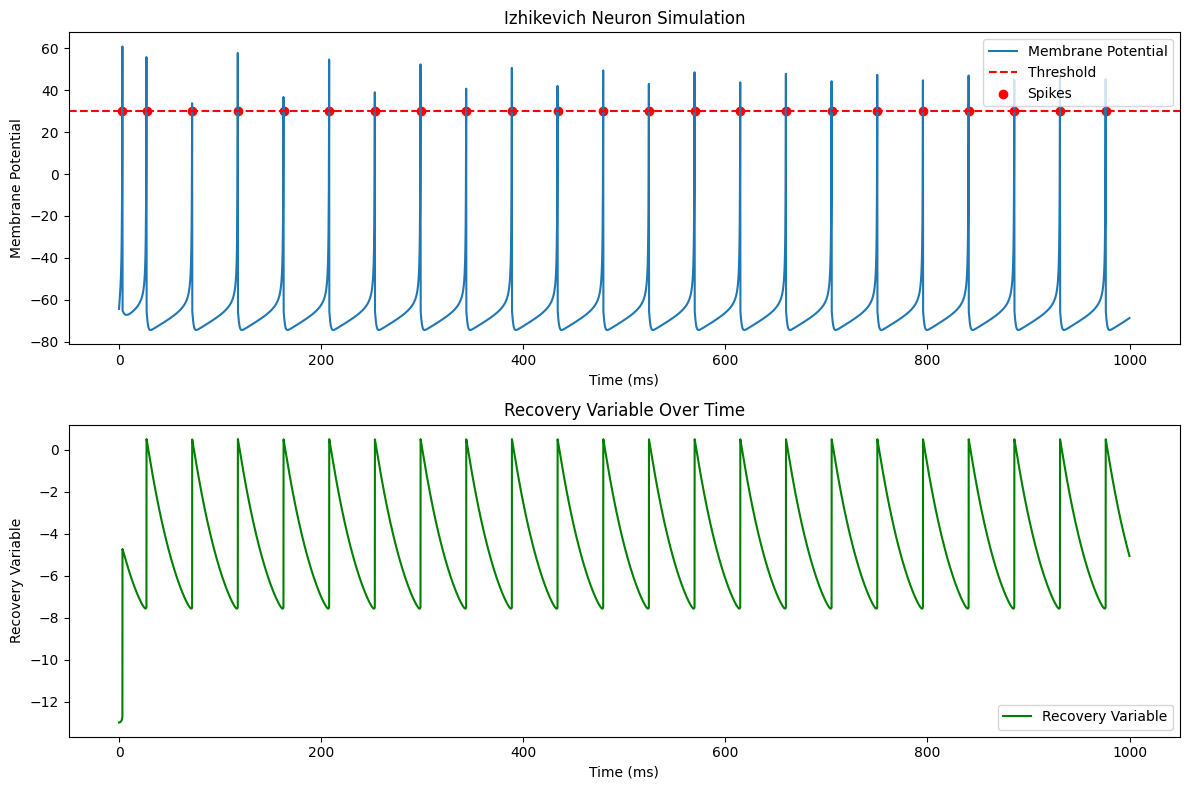

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)

plt.plot(time, V_trace, label="Membrane Potential")
plt.axhline(30, color='red', linestyle='--', label="Threshold")
plt.scatter(spike_times, [30] * len(spike_times), color='red', label="Spikes")
plt.title('Izhikevich Neuron Simulation')
plt.ylabel('Membrane Potential')
plt.xlabel('Time (ms)')
plt.legend()

plt.subplot(2, 1, 2)

plt.plot(time, U_trace, label="Recovery Variable", color="green")
plt.title('Recovery Variable Over Time')
plt.ylabel('Recovery Variable')
plt.xlabel('Time (ms)')
plt.legend()

plt.tight_layout()
plt.show()